# メルスペクトログラムの抽出と可視化

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [2]:
IN_WAVE_FILE = "in.wav"  # モノラル音声（前提）
OUT_WAVE_FILE = "out_istft.wav"

In [3]:
FRAME_LENGTH = 1024  # フレーム長
HOP_LENGTH = 80  # フレームのシフト長
N_OVERLAP = FRAME_LENGTH - HOP_LENGTH  # オーバーラップ幅
N_MELS = 128  # メルフィルタバンクの数

In [4]:
# 音声データ読み込み (fsがサンプリング周波数、dataは音声データ)
fs, data = wavfile.read(IN_WAVE_FILE)
data = data.astype(np.float64)

In [5]:
# メルスペクトログラムの抽出
mel_spec = librosa.feature.melspectrogram(
    y=data, sr=fs, n_mels=N_MELS, hop_length=HOP_LENGTH
)

# デシベルスケールにする
mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)

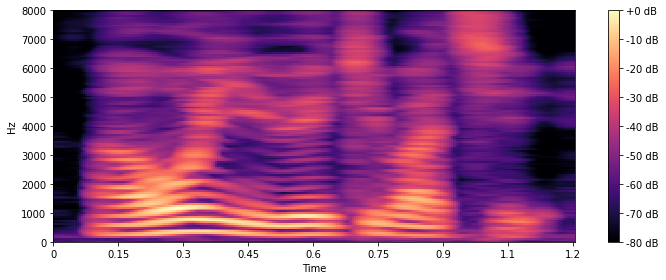

In [6]:
# メルスペクトログラムの表示
fig = plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_spec_dB, x_axis="time", y_axis="hz", hop_length=HOP_LENGTH, sr=fs
)
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()